In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../diabetes.csv")

In [3]:
pop_bp_stats = data["BloodPressure"].describe()


In [4]:
def bootstrap(data, n=500, sample_size=150):
    means = []
    stds = []
    percentiles = []
    for i in range(n):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
        stds.append(np.std(sample))
        percentiles.append(np.percentile(sample, 75))
    return means, stds, percentiles


In [5]:
bp_means, bp_stds, bp_percentiles = bootstrap(data["BloodPressure"])


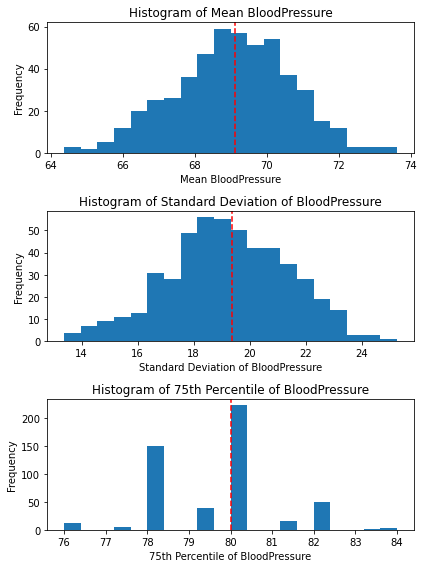

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))
axs[0].hist(bp_means, bins=20)
axs[0].axvline(x=pop_bp_stats["mean"], color='r', linestyle='--')
axs[0].set_title("Histogram of Mean BloodPressure")
axs[0].set_xlabel("Mean BloodPressure")
axs[0].set_ylabel("Frequency")
axs[1].hist(bp_stds, bins=20)
axs[1].axvline(x=pop_bp_stats["std"], color='r', linestyle='--')
axs[1].set_title("Histogram of Standard Deviation of BloodPressure")
axs[1].set_xlabel("Standard Deviation of BloodPressure")
axs[1].set_ylabel("Frequency")
axs[2].hist(bp_percentiles, bins=20)
axs[2].axvline(x=pop_bp_stats["75%"], color='r', linestyle='--')
axs[2].set_title("Histogram of 75th Percentile of BloodPressure")
axs[2].set_xlabel("75th Percentile of BloodPressure")
axs[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
print("Population Mean, Standard Deviation, and 75th Percentile of BloodPressure:")
print(pop_bp_stats)
print("Bootstrap Mean, Standard Deviation, and 75th Percentile of BloodPressure:")
print("Mean:", np.mean(bp_means), ", Standard Deviation:", np.mean(bp_stds), ", 75th Percentile:", np.mean(bp_percentiles))

Population Mean, Standard Deviation, and 75th Percentile of BloodPressure:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Bootstrap Mean, Standard Deviation, and 75th Percentile of BloodPressure:
Mean: 69.06108 , Standard Deviation: 19.21492200490625 , 75th Percentile: 79.514
